In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## Starting with spreadsheets and text files with a list of trees

In [14]:
wind_river_df = pd.read_csv('../data/raw/wind_river/plot_data/wind_river_12ha_PSME.csv').dropna(axis=1)
wind_river_df.head()

,TAG,SPECIES,DBH,HEIGHT,L,MAXR,X,Y,Z
0,40,PSME,144.5,55.7,29.4,5.8,320.5,226.3,374.9
1,54,PSME,81.5,45.0,16.7,4.8,313.1,244.7,374.7
2,84,PSME,111.6,51.5,24.2,5.3,335.2,243.7,374.9
3,91,PSME,166.5,57.4,31.9,6.1,347.5,199.8,375.6
4,98,PSME,102.5,49.9,22.3,5.1,338.2,204.8,375.0


## Georeferencing location of trees relative to southwest corner of each plot

In [ ]:
f, ax = plt.subplots(1, figsize=(14, 20))
plots = gpd.read_file('../data/interim/hj_andrews/hj_andrews_good_plots.shp')
plots.plot(ax=ax);

## Producing a geo-referenced shapefile

In [8]:
wind_river_gdf = gpd.read_file('../data/interim/wind_river/wind_river_live_trees.shp')
wind_river_gdf.head()

,TAG,SPECIES,DBH,HEIGHT,L,MAXR,X,Y,Z,UTM_X,UTM_Y,geometry
0,1,TSHE,24.5,22.4,17.7,3.5,316.7,200.7,375.3,581426.7,5074521.7,POINT (581426.7 5074521.7)
1,5,TSHE,26.0,23.4,18.6,3.6,312.9,204.6,375.5,581422.9,5074525.6,POINT (581422.9 5074525.6)
2,7,TSHE,22.5,21.0,16.4,3.5,309.8,208.1,375.4,581419.8,5074529.1,POINT (581419.8 5074529.1)
3,8,TABR,8.4,5.3,2.9,2.6,302.7,212.9,375.3,581412.7,5074533.9,POINT (581412.7 5074533.9)
4,9,THPL,126.7,46.1,28.2,4.9,301.1,213.3,375.4,581411.1,5074534.3,POINT (581411.1 5074534.3)


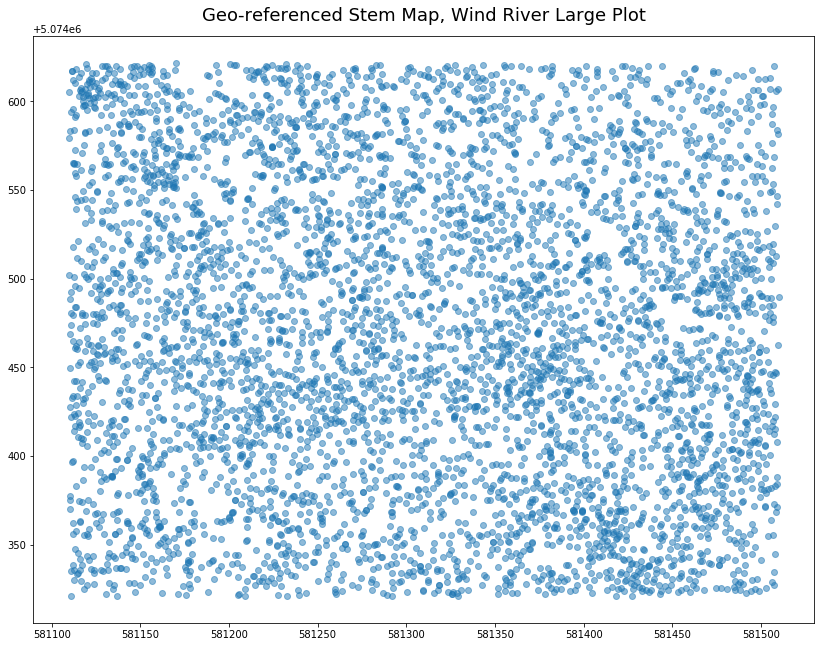

In [9]:
f, ax = plt.subplots(1, figsize=(14, 20))
wind_river_gdf.plot(ax=ax, alpha=0.5)
ax.set_title('Geo-referenced Stem Map, Wind River Large Plot', fontsize=18, pad=15);

In [10]:
wind_river_gdf['cr_ratio'] = wind_river_gdf.L / wind_river_gdf.HEIGHT

In [11]:
wind_river_gdf.columns

Index(['TAG', 'SPECIES', 'DBH', 'HEIGHT', 'L', 'MAXR', 'X', 'Y', 'Z', 'UTM_X',
       'UTM_Y', 'geometry', 'cr_ratio'],
      dtype='object')

In [12]:
wind_river_gdf = wind_river_gdf.rename({'TAG': 'tree_id', 
                       'SPECIES':'species', 
                       'DBH':'dbh',
                       'HEIGHT':'top_height',
                       'MAXR':'cr_radius',
                       'UTM_X':'stem_x',
                       'UTM_Y':'stem_y'
                      }, axis='columns').drop(labels=['L', 'X', 'Y', 'Z'],
                                              axis=1)

In [13]:
wind_river_gdf.to_file('../data/processed/wind_river/wind_river_tree_list.shp')